In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging
import xgboost as xgb
import torch
from transformers import BertTokenizer, BertModel
import xgboost as xgb
from sklearn import svm
from catboost import CatBoostClassifier, Pool
from sklearn.feature_extraction.text import TfidfVectorizer

/home/vini/Área de Trabalho/cv-indexing/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
input_csv = 'output_preprocess.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:   id                                               text     class  \
0   1  benefit advocate supervisor summary represent ...  ADVOCATE   
1   2  vzw customer tech advocate overview flexible i...  ADVOCATE   
2   4  personal banker(safe)1 business advocate profi...  ADVOCATE   
3   5  patient advocate summary customer service prof...  ADVOCATE   
4   6  patient advocate summary highly drive organize...  ADVOCATE   

   class_number  senioridade  
0             1            2  
1             1            0  
2             1            0  
3             1            0  
4             1            1  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['senior'], test_size=0.25, random_state=None)

In [6]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = MultinomialNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [7]:
def train_random_forest(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = RandomForestClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


In [8]:
def train_bernoulli(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = BernoulliNB()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [9]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [10]:
def train_knn(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [11]:
def train_xgboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [12]:
def train_svm(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = svm.SVC()
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [13]:
def train_xgboost2(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=1000, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1)
    clf.fit(X_train_counts, y_train)
    y_pred = clf.predict(X_test_counts)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [14]:
def train_catboost(X_train, y_train, X_test, y_test):
    vectorizer = CountVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    train_pool = Pool(data=X_train_tfidf, label=y_train)
    test_pool = Pool(data=X_test_tfidf, label=y_test)
    clf = CatBoostClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=1000,
        l2_leaf_reg=0
    )
    clf.fit(train_pool, verbose=0)
    y_pred = clf.predict(test_pool)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [15]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)
  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)
  plt.ylabel('Accuracies')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [16]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)
nb_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)
rf_accuracy = train_random_forest(X_train, y_train, X_test, y_test)
lr_accuracy = train_logistic_regression(X_train, y_train, X_test, y_test)
br_accuracy = train_bernoulli(X_train, y_train, X_test, y_test)
xg_accuracy = train_xgboost(X_train, y_train, X_test, y_test)
svm_accuracy = train_svm(X_train,y_train,X_test,y_test)
xg_accuracy2 = train_xgboost2(X_train, y_train, X_test, y_test)
cat_accuracy = train_catboost(X_train,y_train,X_test,y_test)

In [17]:
accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 9': knn_accuracy,
    'XGBoost': xg_accuracy,
    'SVM' : svm_accuracy,
    'XGBoost2' : xg_accuracy2,
    'Cat' : cat_accuracy
}

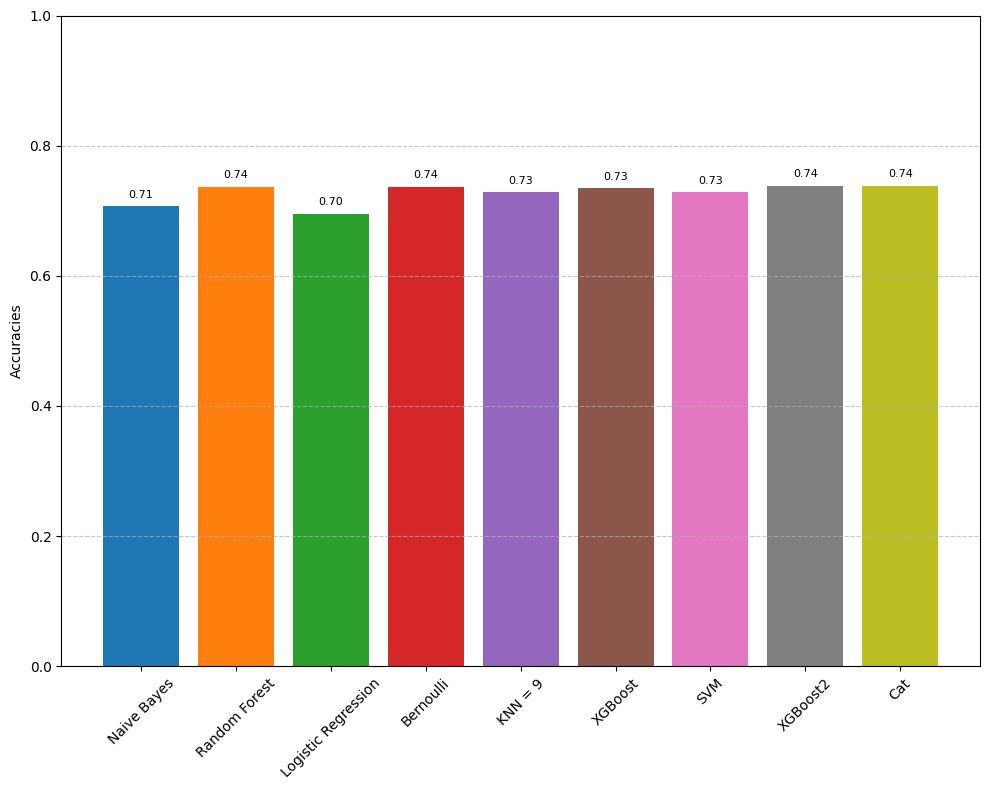

In [18]:
plot_accuracies(accuracies)

In [19]:
def train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list):
    vectorizer = CountVectorizer()
    X_train_counts = vectorizer.fit_transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
    
    accuracies = []
    
    for n in n_neighbors_list:
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(X_train_counts, y_train)
        y_pred = clf.predict(X_test_counts)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    return accuracies

In [20]:

def plot_accuraciesK(n_neighbors_list, accuracies):
    plt.figure(figsize=(10, 6))
    plt.plot(n_neighbors_list, accuracies, marker='o')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.title('KNN')
    plt.grid(True)
    plt.show()

In [21]:
n_neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15]
accuraciesK = train_knn_multiple_n(X_train, y_train, X_test, y_test, n_neighbors_list)


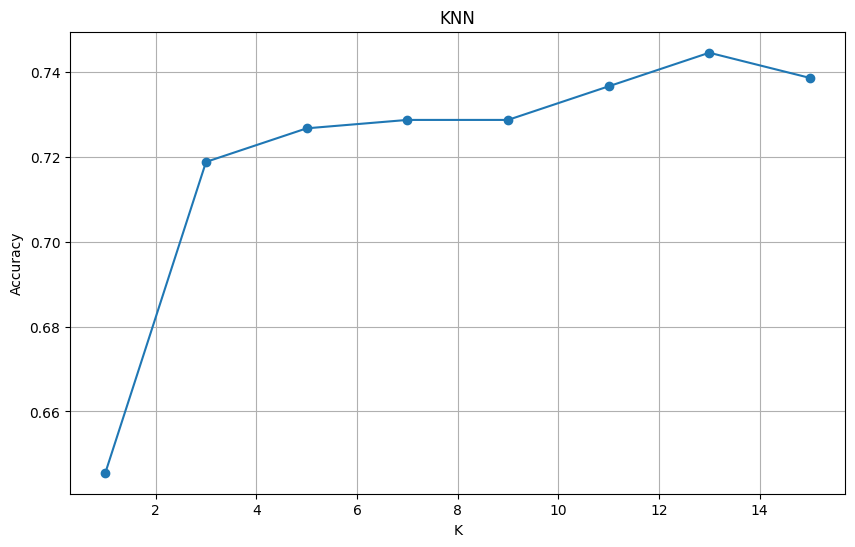

In [22]:
plot_accuraciesK(n_neighbors_list, accuraciesK)